In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3
from sqlite3 import Error

In [3]:
class Database:
    def __init__(self, database_name=':memory:'):
        self.conn = None;
        self.c = None;
        self.create_connection(database_name)
        self.create_table()
        
    def create_connection(self, database_name):
        try:
            self.conn = sqlite3.connect(database_name)
            self.c = self.conn.cursor()
        except Error as e:
            print(e)
    
    def create_table(self):
        try:
            create_cars_price_table = ''' CREATE TABLE IF NOT EXISTS cars_price(
                                            id integer PRIMARY KEY,
                                            make text NOT NULL,
                                            model text NOT NULL,
                                            priceUSD FLOAT,
                                            year integer,
                                            condition text,
                                            mileage FLOAT,
                                            fuel_type text,
                                            volume text,
                                            color text,
                                            transmission text,
                                            drive_unit text,
                                            segment text
                                        );'''
            self.c.execute(create_cars_price_table)
            
            insert_into_table = """INSERT INTO cars_price
                                  (id, make, model, priceUSD, year, condition, mileage,
                                  fuel_type, volume, color, transmission, drive_unit, segment)
                                  VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);"""
            df = np.array(pd.read_csv (r'cars_price.csv'))
            for i in range(len(df)):
                self.c.execute(insert_into_table, tuple(df[i]))
            self.conn.commit()
        except Error as e:
            print(e)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
cardata=pd.read_csv(r'cars_price.csv')
cardata.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [9]:
cardata.isnull().sum()

Unnamed: 0                0
make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [10]:
cardata.describe()

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.00000,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,19999.50000,7430.383775,2003.485625,2.434332e+05,2103.201676
std,11547.14972,8338.242134,8.114896,3.167033e+05,938.724653
min,0.00000,95.000000,1938.000000,0.000000e+00,500.000000
25%,9999.75000,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,19999.50000,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,29999.25000,9850.000000,2010.000000,3.087610e+05,2300.000000
max,39999.00000,195000.000000,2019.000000,9.999999e+06,20000.000000


In [15]:
car_makers = list(set(cardata['make']))
car_makers.sort()

In [16]:
print(car_makers)

['acura', 'alfa-romeo', 'aro', 'aston-martin', 'audi', 'bentley', 'bmw', 'bogdan', 'buick', 'byd', 'cadillac', 'changan', 'chery', 'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu', 'datsun', 'dong-feng', 'eksklyuziv', 'faw', 'fiat', 'ford', 'fso', 'gaz', 'geely', 'gmc', 'great-wall', 'hafei', 'haval', 'honda', 'hyundai', 'infiniti', 'iran-khodro', 'isuzu', 'izh', 'jac', 'jaguar', 'jeep', 'kia', 'lada-vaz', 'lancia', 'land-rover', 'lexus', 'lifan', 'lincoln', 'luaz', 'maserati', 'mazda', 'mclaren', 'mercedes-benz', 'mercury', 'mg', 'mini', 'mitsubishi', 'moskvich', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'porsche', 'proton', 'raf', 'ravon', 'renault', 'roewe', 'rover', 'saab', 'saipa', 'saturn', 'scion', 'seat', 'shanghai-maple', 'skoda', 'smart', 'ssangyong', 'subaru', 'suzuki', 'tagaz', 'tata', 'tesla', 'toyota', 'uaz', 'volkswagen', 'volvo', 'vortex', 'wartburg', 'zaz', 'zotye']


(array([3.7846e+04, 1.7400e+03, 2.8200e+02, 7.3000e+01, 3.4000e+01,
        9.0000e+00, 9.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([9.500000e+01, 1.958550e+04, 3.907600e+04, 5.856650e+04,
        7.805700e+04, 9.754750e+04, 1.170380e+05, 1.365285e+05,
        1.560190e+05, 1.755095e+05, 1.950000e+05]),
 [<matplotlib.patches.Polygon at 0x7fc0451b9a00>])

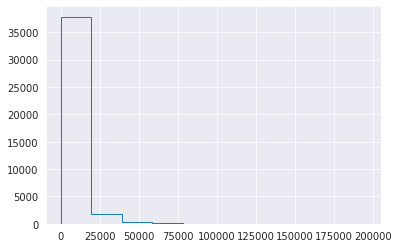

In [18]:
sns.set_style('darkgrid')
plt.hist(cardata['priceUSD'],histtype='step')

/home/agni/miniconda3/envs/tf/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='priceUSD', ylabel='Density'>

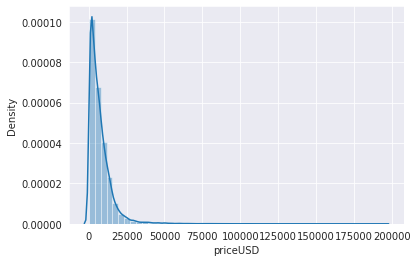

In [19]:
sns.distplot(cardata['priceUSD'])

In [20]:
print('Mean:',cardata.priceUSD.mean())
print('Median:',cardata.priceUSD.median())
print('Standard Deviation:',cardata.priceUSD.std())
print('Variance:',cardata.priceUSD.var())

Mean: 7430.383775
Median: 5350.0
Standard Deviation: 8338.242133614778
Variance: 69526281.87878872


In [21]:
cardata.priceUSD.describe()

count     40000.000000
mean       7430.383775
std        8338.242134
min          95.000000
25%        2350.000000
50%        5350.000000
75%        9850.000000
max      195000.000000
Name: priceUSD, dtype: float64

/home/agni/miniconda3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='make', ylabel='count'>

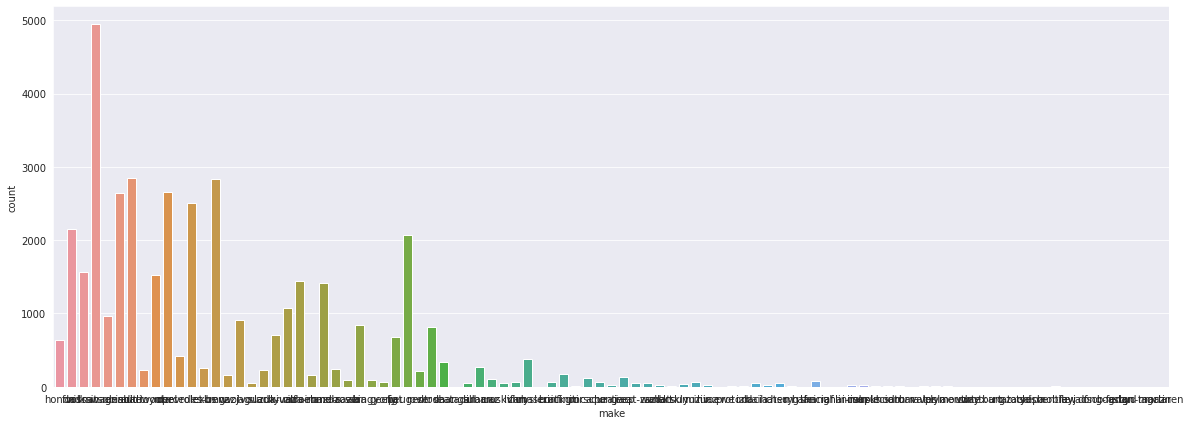

In [29]:
plt.figure(figsize=[20,7])
sns.countplot(cardata.make)

/home/agni/miniconda3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

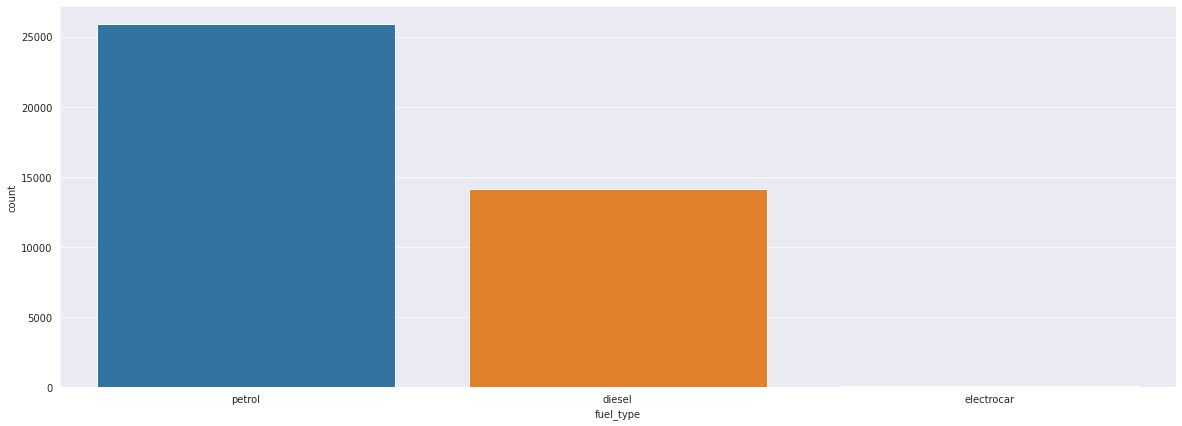

In [39]:
plt.figure(figsize=[20,7])
sns.countplot(cardata.fuel_type)

/home/agni/miniconda3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

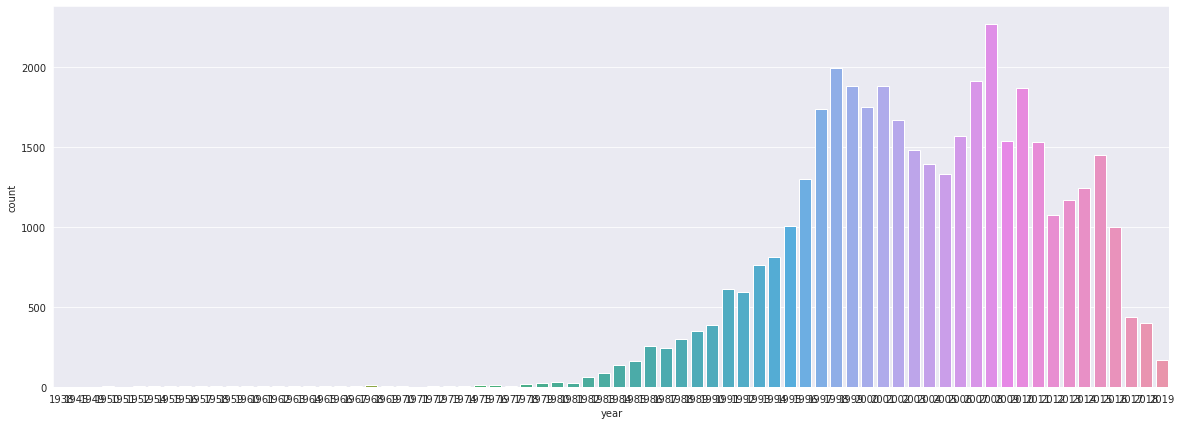

In [33]:
plt.figure(figsize=[20,7])
sns.countplot(cardata.year)

/home/agni/miniconda3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition', ylabel='count'>

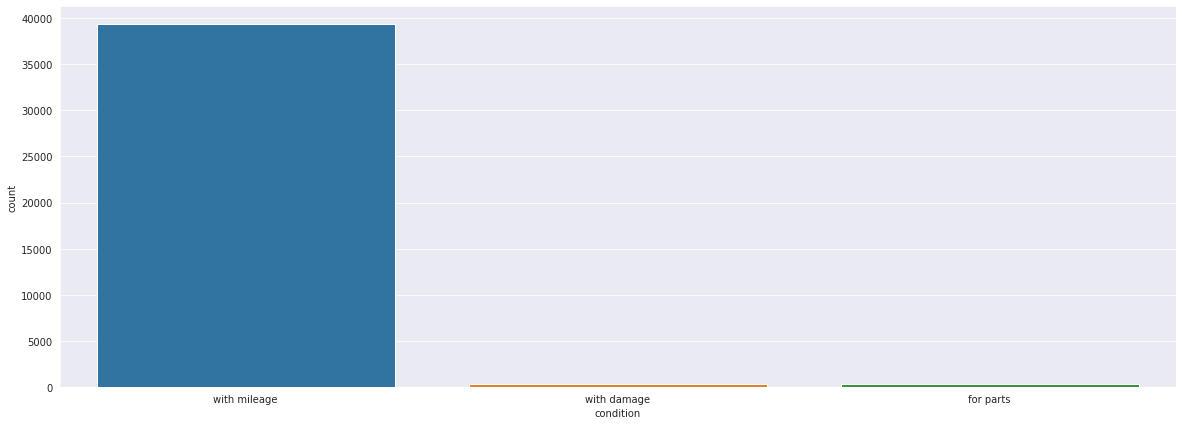

In [34]:
plt.figure(figsize=[20,7])
sns.countplot(cardata.condition)

/home/agni/miniconda3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='count'>

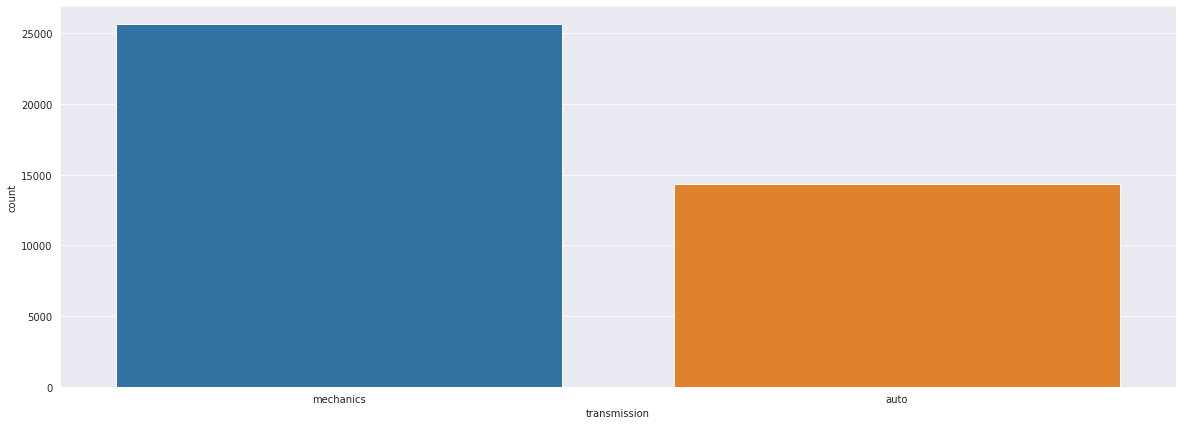

In [36]:
plt.figure(figsize=[20,7])
sns.countplot(cardata.transmission)

/home/agni/miniconda3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drive_unit', ylabel='count'>

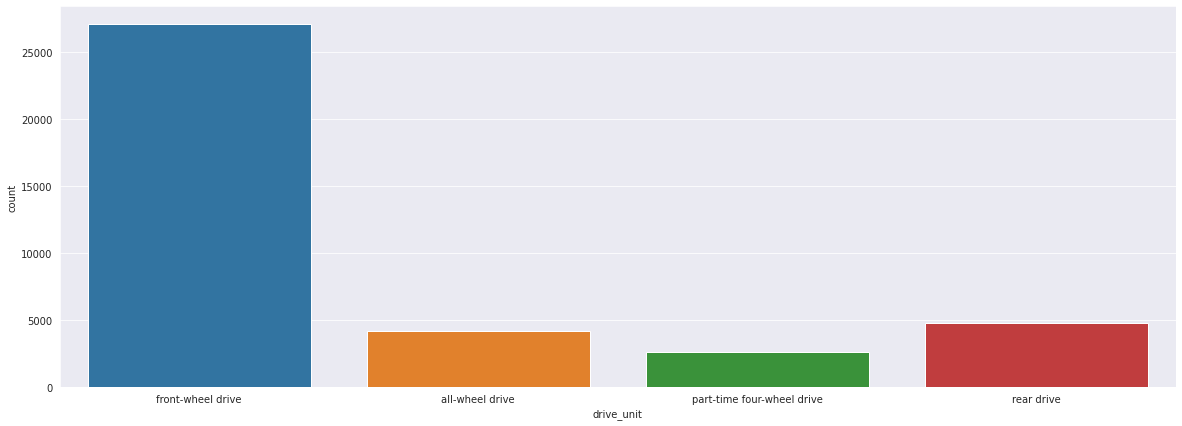

In [37]:
plt.figure(figsize=[20,7])
sns.countplot(cardata.drive_unit)

/home/agni/miniconda3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='segment', ylabel='count'>

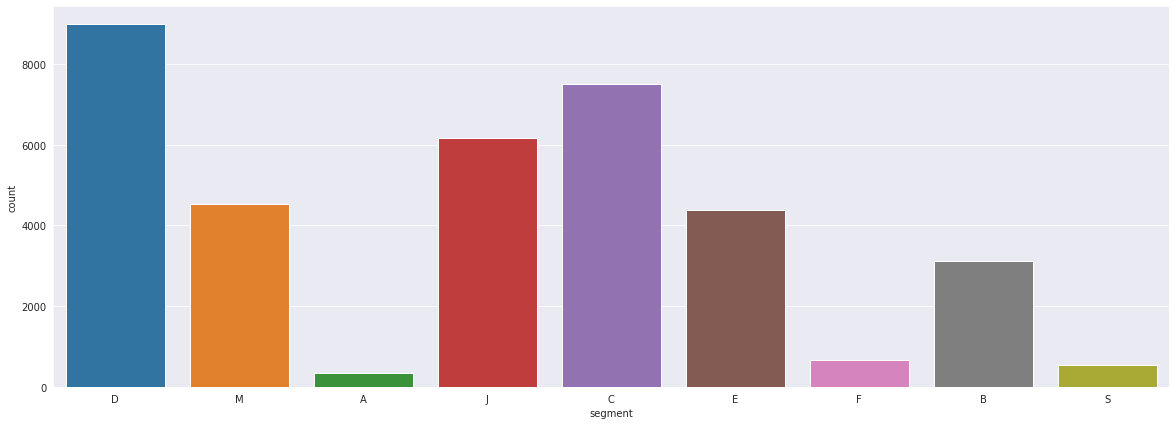

In [38]:
plt.figure(figsize=[20,7])
sns.countplot(cardata.segment)

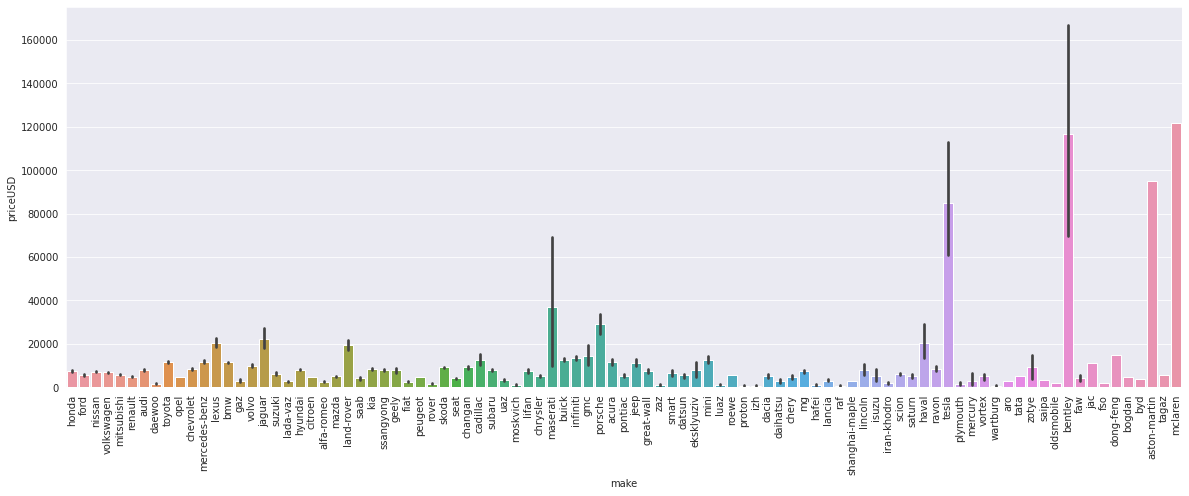

In [93]:
plt.figure(figsize=[20,7])
ax = sns.barplot(x=cardata.make,y=cardata.priceUSD)
a = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<AxesSubplot:xlabel='fuel_type', ylabel='priceUSD'>

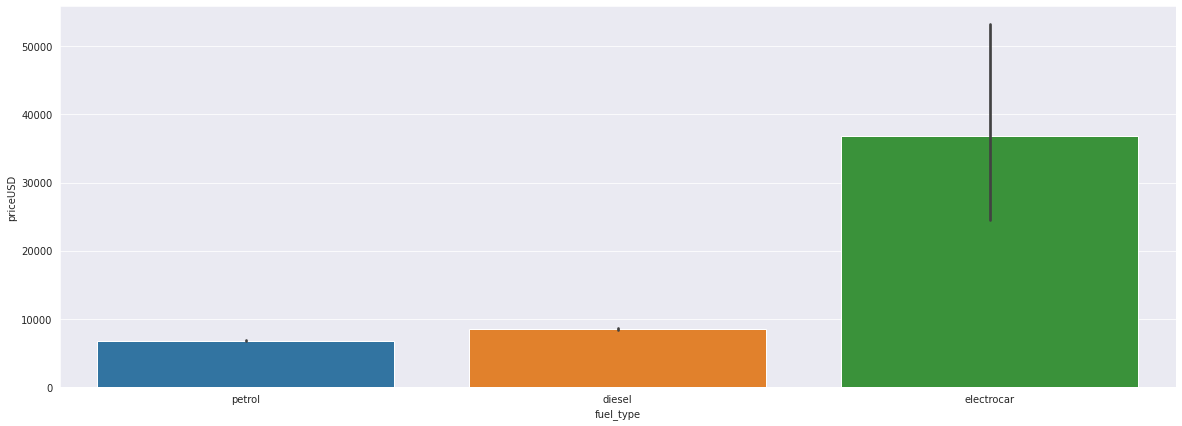

In [95]:
plt.figure(figsize=[20,7])
sns.barplot(x=cardata.fuel_type,y=cardata.priceUSD)

<AxesSubplot:xlabel='transmission', ylabel='priceUSD'>

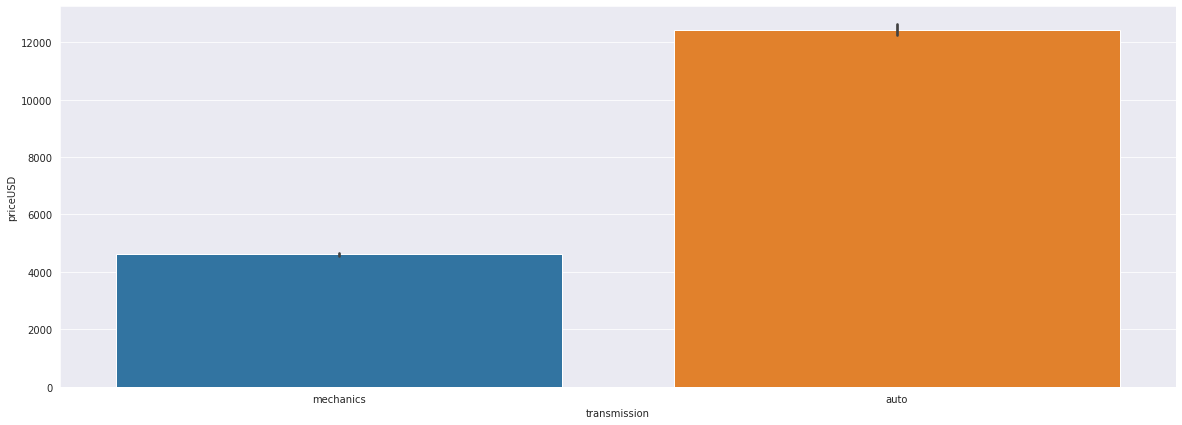

In [96]:
plt.figure(figsize=[20,7])
sns.barplot(x=cardata.transmission,y=cardata.priceUSD)

In [45]:
make	model	priceUSD	year	condition	mileage(kilometers)	fuel_type	volume(cm3)	color	transmission	drive_unit	segment

SyntaxError: invalid syntax (<ipython-input-45-8230d236a710>, line 1)

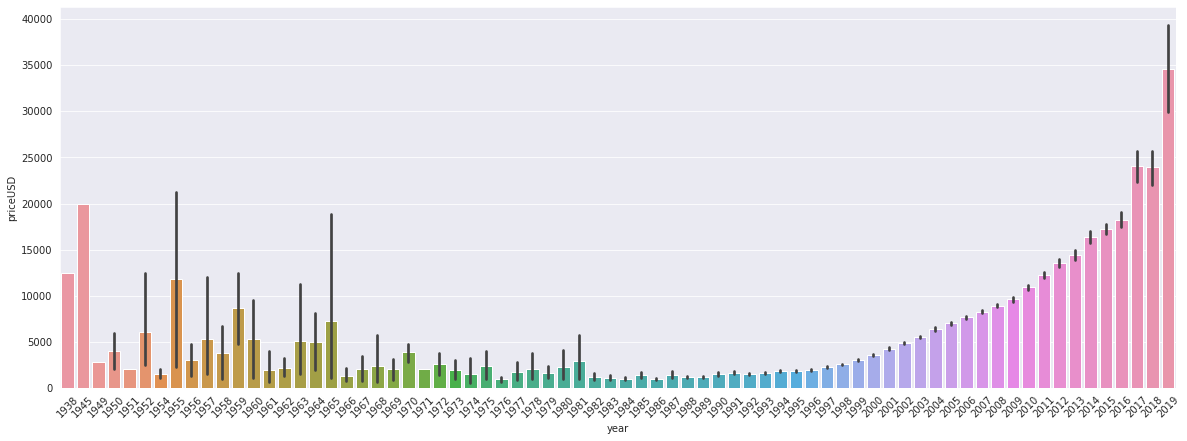

In [94]:
plt.figure(figsize=[20,7])
ax = sns.barplot(x='year',y='priceUSD',data=cardata)
a = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

<AxesSubplot:xlabel='drive_unit', ylabel='priceUSD'>

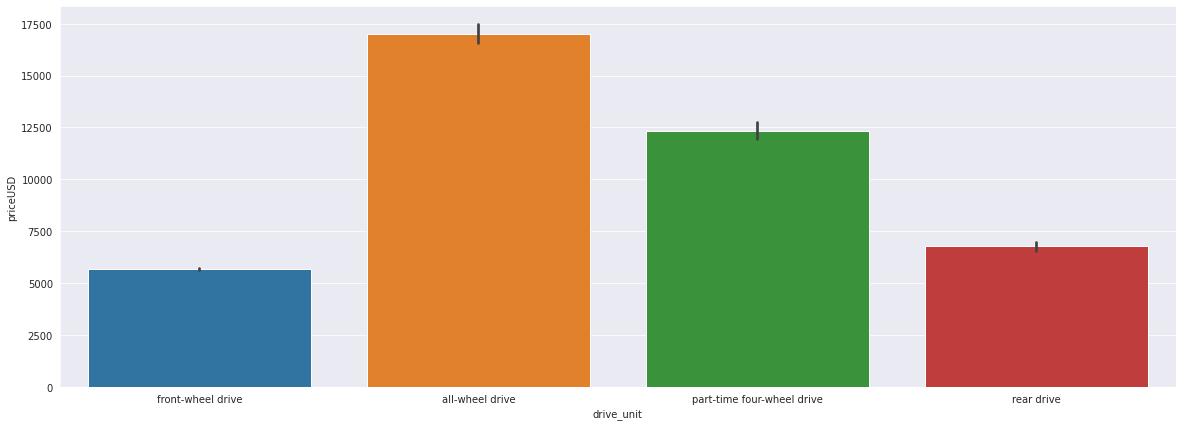

In [97]:
plt.figure(figsize=[20,7]) 
sns.barplot(x=cardata.drive_unit,y=cardata.priceUSD)

<AxesSubplot:xlabel='segment', ylabel='priceUSD'>

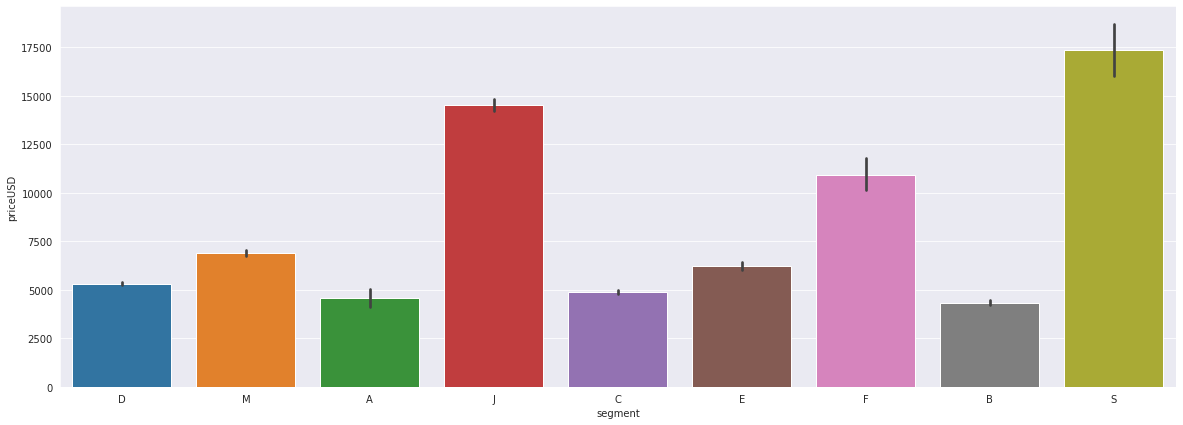

In [98]:
plt.figure(figsize=[20,7])
sns.barplot(x=cardata.segment,y=cardata.priceUSD)

<AxesSubplot:>

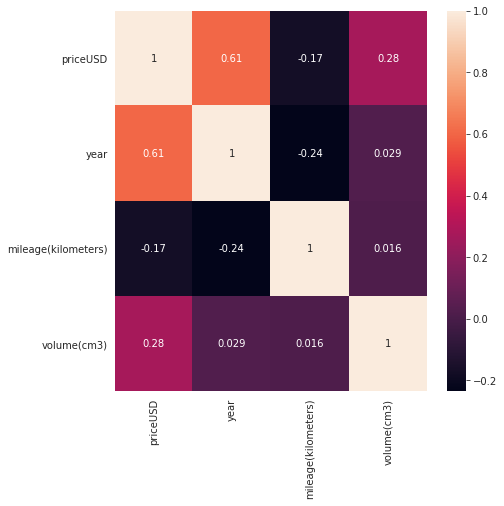

In [53]:
plt.figure(figsize=[7,7])
cardata.drop(['Unnamed: 0'],axis=1,inplace=True)
sns.heatmap(cardata.corr(),annot=True)

In [ ]:
Unnamed: 0	make	model	priceUSD	year	condition	mileage(kilometers)	fuel_type	volume(cm3)	color	transmission	drive_unit	segment

In [54]:
cardata_copy = cardata.copy()

In [55]:
cardata_copy.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [59]:
cardata_encoded =pd.get_dummies(cardata)
cardata_encoded.head()

,priceUSD,year,mileage(kilometers),volume(cm3),make_acura,make_alfa-romeo,make_aro,make_aston-martin,make_audi,make_bentley,...,drive_unit_rear drive,segment_A,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,565,1993,960015.0,2000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5550,2008,172000.0,1400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8300,2008,223000.0,2500.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3300,2005,140000.0,1200.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2450,2002,413000.0,2200.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [63]:
# predictors=cardata_encoded['make', 'model', 'priceUSD', 'year', 'condition', 'mileage(kilometers)',	
#                    'fuel_type', 'volume(cm3)', 'color',	'transmission',	'drive_unit','segment']
predictors=cardata_encoded['year']
target=cardata_encoded['priceUSD']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                 2.356e+04
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:14:45   Log-Likelihood:            -4.0864e+05
No. Observations:               40000   AIC:                         8.173e+05
Df Residuals:                   39998   BIC:                         8.173e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.246e+06   8165.890   -152.575      0.0

In [65]:
predictors=cardata_encoded['mileage(kilometers)']
target=cardata_encoded['priceUSD']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1216.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          1.48e-262
Time:                        21:15:19   Log-Likelihood:            -4.1730e+05
No. Observations:               40000   AIC:                         8.346e+05
Df Residuals:                   39998   BIC:                         8.346e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8531.4436    

In [68]:
# Replace using median 
median = cardata_encoded['volume(cm3)'].median()
cardata_encoded['volume(cm3)'].fillna(median, inplace=True)


predictors=cardata_encoded['volume(cm3)']
target=cardata_encoded['priceUSD']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     3196.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:21:00   Log-Likelihood:            -4.1636e+05
No. Observations:               40000   AIC:                         8.327e+05
Df Residuals:                   39998   BIC:                         8.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2347.0322     98.463     23.837      